***
<a id='lesson-9'></a>
# Epicycle: a circle rolling over another circle
***

Circle moving on other circle is a frequent motif in the models of planetary model.  For example, imagine descirbing the motion of moon; in a helio-centric model, moon circles earth while the earth circles around the sun. 

Fourier showed that ANY curve can be described as a motion of a circle which is moving on another circle, which is moving on another circle and so on. In this lesson, we will explore the Fourier analysis using complex numbers.

We want to model a closed curve in two dimensions; as a simplistic example, consider a circle with center at origin given by $x^2 + y^2 = c^2$, with $c$ being the radius of the circle. Of specific interest is the parametric description with parameter $t$, the circle has following parametric description: $x(t) = c \cos(t)$ and $y(t) = c \sin(t)$. The complex number description of this parametrization is given by $z(t) = c \exp(j t)$ where $j= \sqrt{-1}$. 

Let us consider:  $z(t) = c e^{jt}$, this has $z(t) = z(t+ 2 \pi)$, i.e. with a period of $2\pi$ any point returns to itself. 

Now consider: $z(t) = c e^{njt}$, this has $z(t) = z(t + 2\pi/n)$, i.e. with a period of $2\pi/n$ evey point returns to itself. 

For the sake of having a period 1 unit of time and fractions of it, we will consider $z(t) = c e^{2\pi n j t}$, which has a period of 1/n unit of time.



See python documentation for `cmath` at https://docs.python.org/3.5/library/cmath.html

Consider an epicycle given by: $z(t) = c_1 e^{2\pi jt} + c_2 e^{30\pi jt}$

Consider that there are a series of observations $\vec{r}_i= (x_i,y_i),\, i\in[1,N]$. We will form the closed curve by $\vec{r}_{N+i} = \vec{r}_i$. We want to find a epicyclic desription of the complex function $z(t)$ such that for $t_i=\tau*i$, we have $z(t_i)=(x_i,y_i)$.  That is, we want to find a description
$$  z(t) = \sum_n c_n * e^{2 \pi j~n~t} \tag{eq:1}
$$
where the coefficient $c_n$ can be a complex number, and $n \in \mathcal{Z}$; later we will show that 
$\tau = \frac{1}{N}$.

Lets try formulate the problem. Given $z_i \forall i \in [1,N]$, with $z_i \equiv z(t_i)$, find $c_n$ in the Equation eq:1 above. 

Solution: Consider $$z(t)*e^{- 2\pi j m t} = \sum_n c_n * e^{2 \pi j~(n-m)~t}$$
then integrating on both sides from $t=0$ $t=1$, gives us 
$$ \int_0^1 dt~z(t)*e^{- 2\pi j m t} = c_m \implies c_m = \tau \sum_{i=1}^{N} z_i*e^{-2\pi j m~i \tau}
$$
Typically $c_n$ is found for $|n| \le n_{max}$ i.e. $n \in [-n_{max}, \cdots, 0 , \cdots, n_{max}]$

Now given the above created dictionary, reconstruct the curve from it


You are given three shapes: curve_para-1-v2.dat, hut-2.dat and pi-3.dat

Find the fourier coefficeints for each of them. Plot the reconstructed curves. Comment

# Tasks:::
1. Write function `compute_Fourier_dict( zvals, n_max )` to return a dictionary for coefficients with index $-n_{max} \le n \le n_{max}$
2. Write function to take the dictornary of fourier coefficents and plot the 'reconstrcution'; funciton `reconstruct_Fourier_dict( fourier_dict )`
3. Use thes functions on the three examples provided to you. Comment.
4. Use Inkscape (Unix) to draw your own shape, and get the curve data and get fourier coefficients, and reconstruction

In [14]:
import cmath
from pathlib import Path

import matplotlib.pyplot as plt

In [15]:
def compute_fourier_dict(zvals, nmax):
    return {
        m: sum(
            zvals[i] * cmath.exp(-2 * cmath.pi * m * i / nmax * 1j) for i in range(nmax)
        )
        / nmax
        for m in range(nmax)
    }


In [16]:
def reconstruct_fourier_dict(fourier_dict):
    nmax = len(fourier_dict)
    return [
        sum(
            fi * cmath.exp(2 * cmath.pi * n * t / nmax * 1j)
            for n, fi in fourier_dict.items()
        )
        for t in range(nmax)
    ]


In [17]:
def complex_to_x_y(complex_list):
    ret_x = []
    ret_y = []
    for c in complex_list:
        ret_x.append(c.real)
        ret_y.append(c.imag)
    return ret_x, ret_y


def plot_from_file_and_fourier(file_path):
    # load original data from file
    original_data = [
        complex(*map(float, line.split()))
        for line in Path(file_path).read_text().splitlines()
        if line
    ]
    original_data.append(original_data[0])

    # first plot original data
    plt.plot(*complex_to_x_y(original_data), label="original data")

    # do a fourier transform, and plot it too
    fourier_coeffs = compute_fourier_dict(original_data, len(original_data))
    new_data = reconstruct_fourier_dict(fourier_coeffs)
    plt.plot(*complex_to_x_y(new_data), label="fourier transformed data")

    plt.legend()
    plt.xlabel("x axis (real part)")
    plt.ylabel("y axis (imaginary part)")


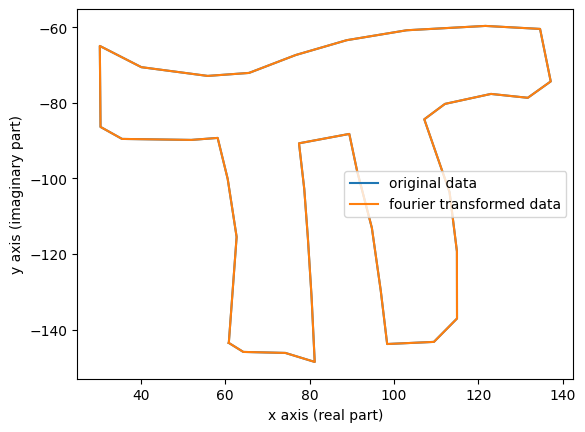

In [18]:
plot_from_file_and_fourier("pi-XY-shapeData.dat")

Here we observe that the dataset generated after doing a fourier transform almost exactly coincides with the original dataset, when plotted. This verifies that the fourier transform is correctly implemented.

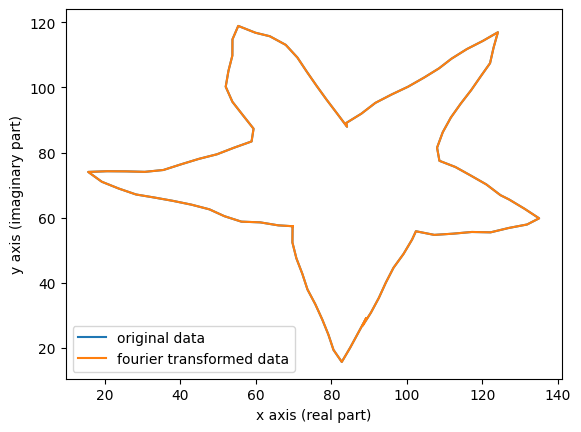

In [19]:
plot_from_file_and_fourier("star.dat")

This is an example of a star shape drawn on inkscape. The svg file is then converted to a `.dat` file that lists coordinates of points that make up the figure. This file is loaded and handled in the same way as above (for the "pi" plot)